# 関数のテスト

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import calc_variogram as variogram
import kriging_est as kriging

In [3]:
%load_ext autoreload
%autoreload 2

In [86]:
data = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/pred_20190407_miyamoto_all_madori_predprice.csv', encoding='Shift_JISx0213')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3852 entries, 0 to 3851
Data columns (total 26 columns):
都道府県               3852 non-null object
市区町村               3852 non-null object
町丁目                3852 non-null object
番地・号               3852 non-null object
築年                 3852 non-null int64
築月                 3852 non-null float64
構造                 3852 non-null object
マンション最上階数          3852 non-null float64
間取別平均平米単価①         3852 non-null float64
間取別平均平米単価②         3852 non-null float64
間取別平均平米単価③         3852 non-null float64
間取別平均平米単価④         3852 non-null float64
間取別平均平米単価⑤         3852 non-null float64
key_code           3852 non-null int64
id_building        3852 non-null object
lat                3852 non-null float64
lon                3852 non-null float64
station_name       3852 non-null object
station_lat        3852 non-null float64
station_lon        3852 non-null float64
geom               3852 non-null object
node_id1           3852 non-null int64
node_

In [87]:
dummy = pd.get_dummies(data.構造, drop_first=True)
dum_col = dummy.columns.values.tolist()

In [88]:
station_dummy = pd.get_dummies(data.station_name, drop_first=True)
st_col = station_dummy.columns.values.tolist()

In [89]:
data['year'] = 2018 - data.築年

In [90]:
data = data.join(dummy).join(station_dummy)

In [91]:
cols = dum_col + st_col + ['マンション最上階数', 'year']

## Step1: OLSから残差を算出

In [99]:
# 前処理
x = data[cols]
y = np.log(data['間取別平均平米単価①'])

In [100]:
x = sm.add_constant(x)

In [101]:
step1 = sm.OLS(y, x)
step1_res = step1.fit()
resid = step1_res.resid

In [102]:
step1_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             間取別平均平米単価①   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     150.7
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        15:21:22   Log-Likelihood:                 5395.5
No. Observations:                3852   AIC:                        -1.069e+04
Df Residuals:                    3804   BIC:                        -1.039e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.2660      0.043    192.554      0.000       8.182       8.350
他             -0.0289      0.047     -0.612      0.541      -0.121       0.064
鉄骨            -0.0415      0.043     -0.958      0.338      -0.126       0.043
鉄骨造           -0.0326      0.043     -0.763      0.445      -0.116       0.051
ＡＬＣ           -0.0643      0.043     -1.499      0.134      -0.148       0.020
ＨＰＣ           -0.0669      0.074     -0.903      0.367      -0.212       0.078
ＰＣ            -0.0824      0.045     -1.821      0.069      -0.171       0.006
ＲＣ            -0.0253      0.043     -0.593      0.553      -0.109       0.058
ＳＲＣ           -0.0480      0.043     -1.114      0.265      -0.133       0.037
上北沢           -0.1637      0.008    -21.392      0.000      -0.179      -0.149
上町            -0.0811      0.009     -8.779      0.000      -0.099      -0.063
上野毛           -0.0921      0.007    -13.708      0.000      -0.105      -0.079
下北沢            0.0345      0.010      3.605      0.000       0.016       0.053
下高井戸          -0.0712      0.011     -6.302      0.000      -0.093      -0.049
世田谷           -0.0677      0.010     -6.824      0.000      -0.087      -0.048
世田谷代田         -0.0037      0.008     -0.487      0.627      -0.019       0.011
九品仏           -0.0418      0.007     -5.882      0.000      -0.056      -0.028
二子玉川園         -0.1305      0.007    -19.367      0.000      -0.144      -0.117
代田橋           -0.0240      0.009     -2.652      0.008      -0.042      -0.006
千歳船橋          -0.1457      0.006    -26.127      0.000      -0.157      -0.135
千歳鳥山          -0.2013      0.005    -38.083      0.000      -0.212      -0.191
喜多見           -0.2033      0.009    -23.275      0.000      -0.220      -0.186
奥沢            -0.0377      0.006     -5.890      0.000      -0.050      -0.025
宮の坂           -0.0891      0.011     -7.978      0.000      -0.111      -0.067
尾山台           -0.0995      0.007    -14.561      0.000      -0.113      -0.086
山下            -0.0888      0.012     -7.638      0.000      -0.112      -0.066
成城学園前         -0.1745      0.007    -26.376      0.000      -0.187      -0.162
新代田           -0.0180      0.009     -2.013      0.044      -0.036      -0.000
明大前           -0.0695      0.008     -8.388      0.000      -0.086      -0.053
東北沢            0.0291      0.009      3.193      0.001       0.011       0.047
東松原           -0.0577      0.008     -7.409      0.000      -0.073      -0.042
松原            -0.0821      0.007    -11.433      0.000      -0.096      -0.068
松陰神社前         -0.0658      0.009     -7.499      0.000      -0.083      -0.049
桜上水           -0.0924      0.011     -8.704      0.000      -0.113      -0.072
桜新町           -0.0871      0.006    -14.753      0.000      -0.099      -0.076
梅ヶ丘           -0.0768      0.009     -8.925      0.000      -0.094      -0.060
池ノ

## Step2: 残差からvariogramを推定

In [103]:
resid.describe()

count    3.852000e+03
mean     1.023499e-13
std      5.963593e-02
min     -4.198582e-01
25%     -3.155061e-02
50%      8.720624e-04
75%      3.193894e-02
max      6.657146e-01
dtype: float64

In [104]:
# 前処理
resid = pd.DataFrame(resid, columns=['residuals'])
resid = data[['lon', 'lat']].join(resid)
resid = resid.values

In [131]:
b = variogram.get_diff(resid)

In [132]:
b.shape

(2, 6308735)

In [112]:
vario = variogram.get_diff(resid)

In [117]:
vario[0] < vario[0].max()*1/2

array([ True,  True,  True, ...,  True,  True,  True])

In [119]:
np.array([var[vario[0] < vario[0].max()*1/2] for var in vario]).sh

(2, 6308735)

[array([0.00148878, 0.01043231, 0.0110742 , ..., 0.00327072, 0.00121241,
        0.00304398]),
 array([2.00933869e-05, 3.12659012e-03, 7.62012432e-04, ...,
        1.37823636e-03, 1.02090124e-04, 7.30114994e-04])]

In [106]:
vario = pd.DataFrame(vario).T[vario[0] < vario[0].max()*1/2].T.values

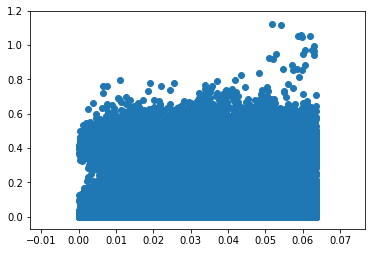

In [108]:
plt.scatter(vario[0], vario[1])
plt.savefig('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/plot/variogram_cloud.png')

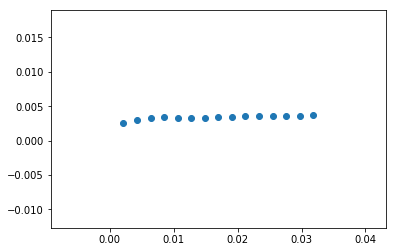

In [109]:
e_vario, lag = variogram.emp_variogram(vario, 15)
plt.scatter(e_vario[0], e_vario[1])

[0.00000000e+00 1.00000000e+02 2.97225211e-03 2.40571460e-02]
[1.00000000e+00 1.00000000e+02 3.15394743e-03 9.66374058e+01
 1.25841520e+01]
[2.00000000e+00 1.00000000e+02 2.97222069e-03 2.34037986e+00
 9.72642850e+01]
[3.00000000e+00 1.00000000e+02 2.97225232e-03 1.57850767e+00
 9.84224038e+01]
[0.         0.0038905  0.00778099 0.01167149 0.01556198 0.01945248
 0.02334298 0.02723347 0.03112397 0.03501446]
0.002972220686987921 2.340379857533158 97.26428502696608
[2.00000000e+00 1.00000000e+02 2.97222069e-03 2.34037986e+00
 9.72642850e+01]


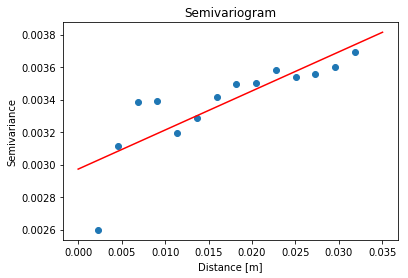

In [110]:
param, lag, fig = variogram.auto_vario(vario, 14)

In [111]:
print(param)

[2.00000000e+00 1.00000000e+02 2.97222069e-03 2.34037986e+00
 9.72642850e+01]


## Step3: gls
- 共分散関数を推定
    - 観測値間の距離行列を作成
    - 推定したパラメータから$\hat{C}(0)$を推定
    - 正定値になるように処理を加える(数学的な根拠は不明, Rではどのように処理している?)
- 共分散関数の推定量を用いてgls

In [40]:
distance_mat = kriging.calc_distance_matrix(data, ['px', 'py'])

In [41]:
efrange, c0 = kriging.calc_c0(param, distance_mat)

In [42]:
print(efrange)

0.1499187183409662


In [43]:
print(c0)

0.19730812928798586


In [44]:
# 距離行列と関数形から共分散関数を求める
# reg=Trueなので正定値化処理を加えている
covariance_mat = kriging.est_covariance_matrix(distance_mat, param, c0)

0.2733364224372941


In [45]:
print(covariance_mat)

[[0.47064455 0.36789361 0.3804317  ... 0.20707913 0.21238202 0.21968644]
 [0.36789361 0.47064455 0.46963813 ... 0.31282009 0.3116277  0.30841805]
 [0.3804317  0.46963813 0.47064455 ... 0.31836757 0.31798655 0.31597677]
 ...
 [0.20707913 0.31282009 0.31836757 ... 0.47064455 0.47008999 0.46765444]
 [0.21238202 0.3116277  0.31798655 ... 0.47008999 0.47064455 0.4694883 ]
 [0.21968644 0.30841805 0.31597677 ... 0.46765444 0.4694883  0.47064455]]


In [46]:
# 重みを用いてgls
# statsmodelsのresultクラスが返る
res, resid = kriging.do_gls(y, x, covariance_mat)

In [47]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.286
Model:                            GLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     25.20
Date:                Wed, 10 Apr 2019   Prob (F-statistic):           6.22e-10
Time:                        15:49:59   Log-Likelihood:                 57.496
No. Observations:                 128   AIC:                            -111.0
Df Residuals:                     126   BIC:                            -105.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
station      -21.5004      3.268     -6.578      0.000     -27.969     -15.032
tokyo         34.0618     12.496      2.726      0.007       9.333      58.790
==============================================================================
Omnibus:                        2.844   Durbin-Watson:                   2.302
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.303
Skew:                           0.292   Prob(JB):                        0.316
Kurtosis:                       3.301   Cond. No.                         3.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Step4: kirigng
- 観測地点と予測地点の間の共分散関数$c_*$を作成する
    - 距離行列作成
    - 共分散関数にあてはめる
- 足し合わせ $\hat{Y}(s_o) = X(s_0)\hat{\beta}_{gls} + c_*'\hat{\Sigma}^{-1}(Y - X\beta)$

In [48]:
# 前処理
mdat = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/house_price_pred.csv')
mdat.head()

,px,py,price,station,tokyo
0,139.402984,35.767626,NaN,0.017537,0.374249
1,139.407036,35.767626,NaN,0.013571,0.370307
2,139.411089,35.767626,NaN,0.009675,0.366367
3,139.439457,35.767626,NaN,0.001584,0.338865
4,139.394878,35.763700,NaN,0.026327,0.381271


In [49]:
mpoints = mdat[['px', 'py']].values
mexog = mdat[['station', 'tokyo']].values

In [50]:
points = data[['px', 'py']].values

In [51]:
# 距離行列作成
new_dist_mat = kriging.calc_distance_new_data(mpoints, points)

In [52]:
# 距離行列と関数型から共分散行列を推定
# reg=Falseを指定して正定値処理をスキップ(正方行列でないのでエラーを防ぐ)
c_mat = kriging.est_covariance_matrix(new_dist_mat, param, c0, reg=False)

In [53]:
fitted_val = kriging.put_pred_val(res, mexog)

In [54]:
kriging_val = kriging.do_kriging(fitted_val, c_mat, covariance_mat, resid)

## Rでの結果との比較

In [55]:
res_inR = pd.read_csv('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/krig_res_R.csv')
res_inR = res_inR.iloc[:, 1:-2]

Text(0, 0.5, 'pred by Python')

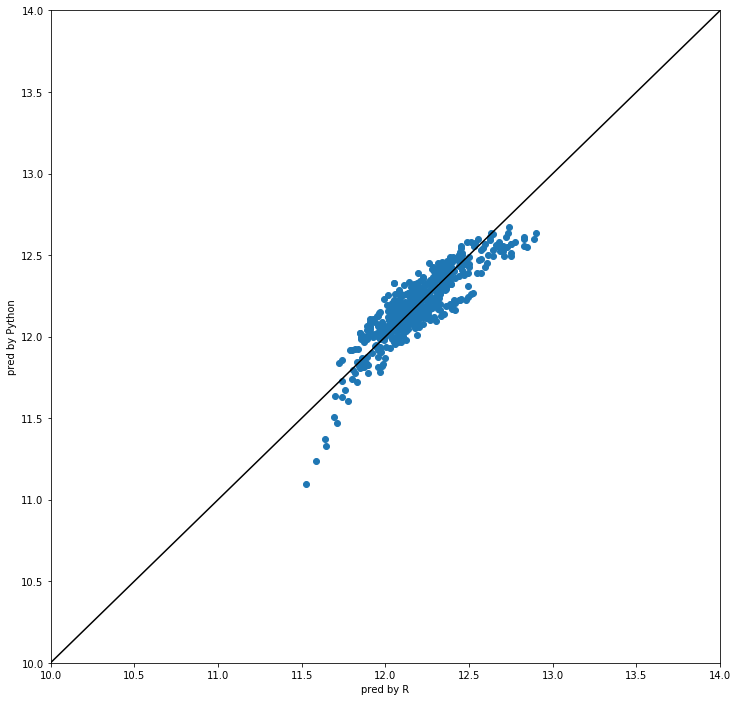

In [56]:
res_fig = plt.figure(figsize=(12, 12))
res_ax = res_fig.add_subplot(1, 1, 1)
res_ax.scatter(res_inR['var1.pred'], kriging_val)
res_ax.plot(np.linspace(10, 14, 1000), np.linspace(10, 14, 1000), color='black')
res_ax.set_xlim(10, 14)
res_ax.set_ylim(10, 14)
res_ax.set_xlabel('pred by R')
res_ax.set_ylabel('pred by Python')
# Rとの結果とそこそこ整合的になった?

In [57]:
res_fig.savefig('/Users/LOng/sengokulab/LDAT_LS_2019/data/dev/plot/kriging_est_func_res2.png')

# Todo
- 共分散関数の$\hat{C}(0)$の推定が指数型分布しか対応していないので、ガウス型などにも拡張
    - 線形型の場合はユーザーが指定するように設定しているが、それで良いのか確認
- クラス化してコードを簡略化